## 1. Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()
import pickle
%matplotlib inline

## 2. Loading Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Understanding Data

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### All are numerical columns

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### No null values are present in the dataset

## 4. EDA

<AxesSubplot:>

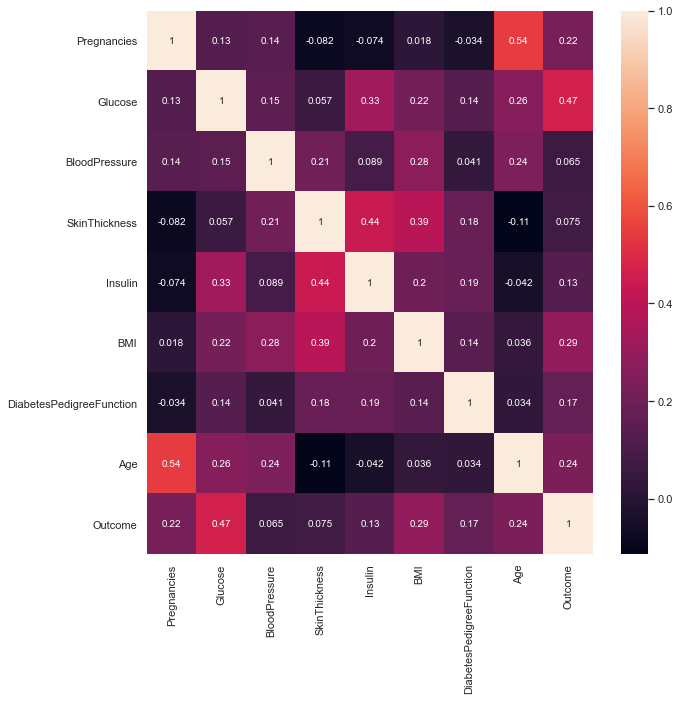

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

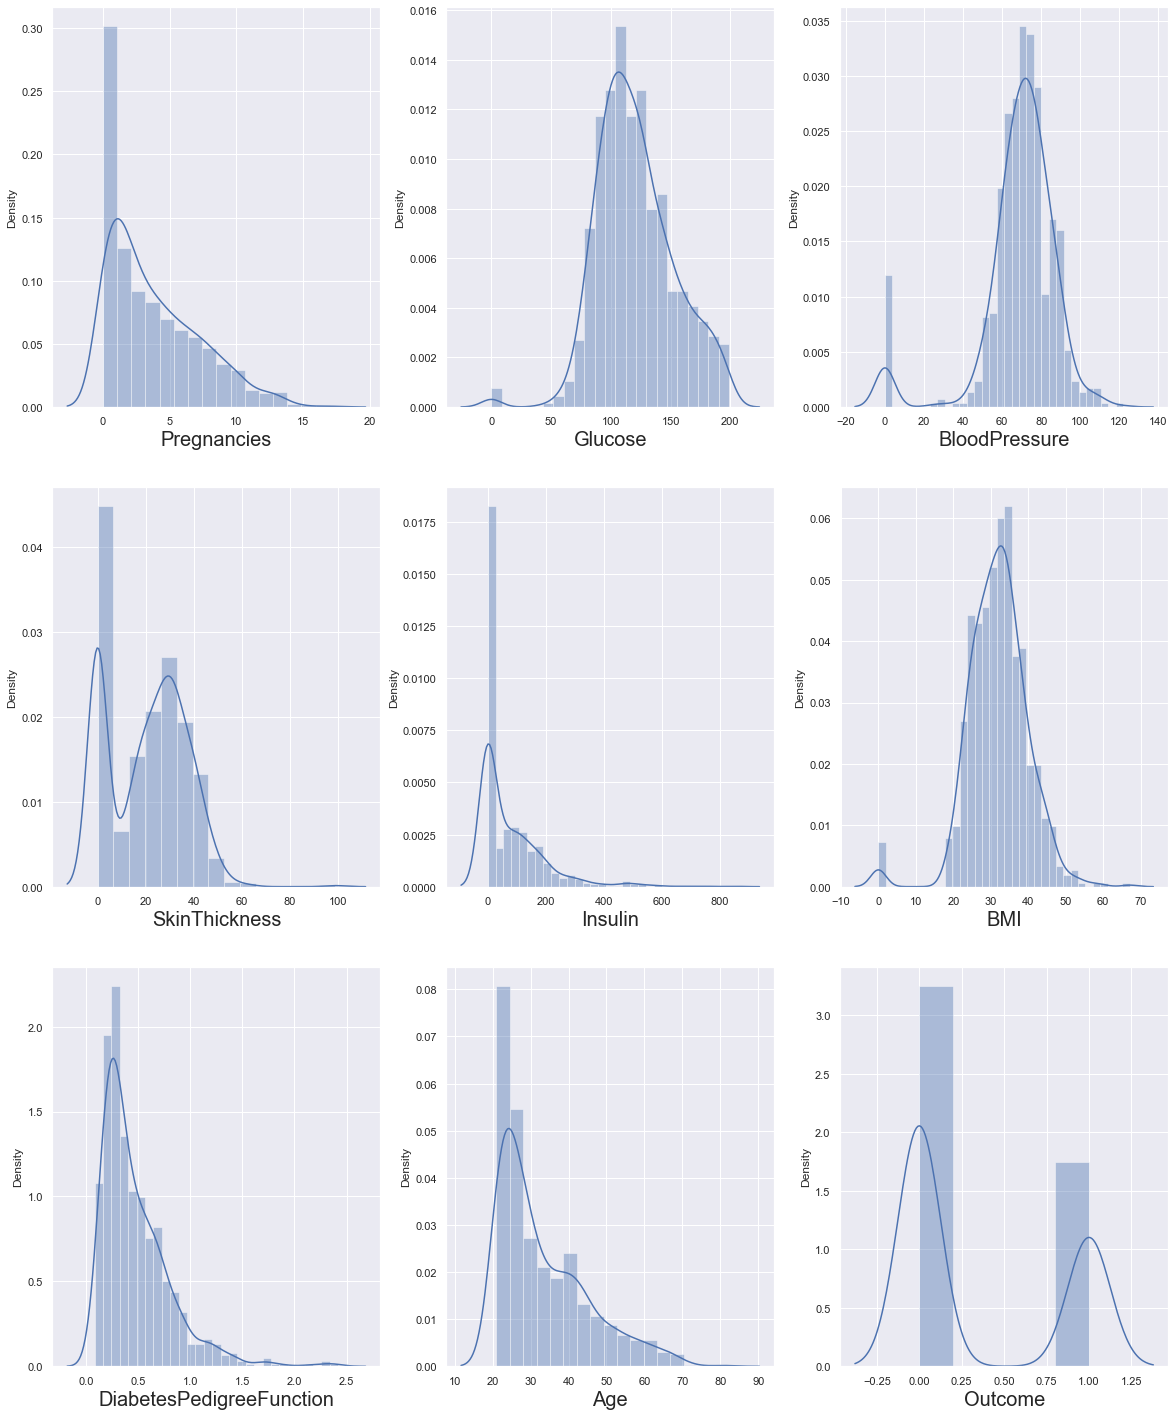

In [7]:
plt.figure(figsize=(20,25),facecolor='white')
i=1
for column in df.columns:
    ax=plt.subplot(3,3,i)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    i+=1

#### There are many values as 0 for features such as Glucose,BloodPressure,SkinThickness,Insulin,BMI which cannot be 0 so we have to replace the 0 with some value or remove it. Also there is some skewness in data which we need to remove

<AxesSubplot:>

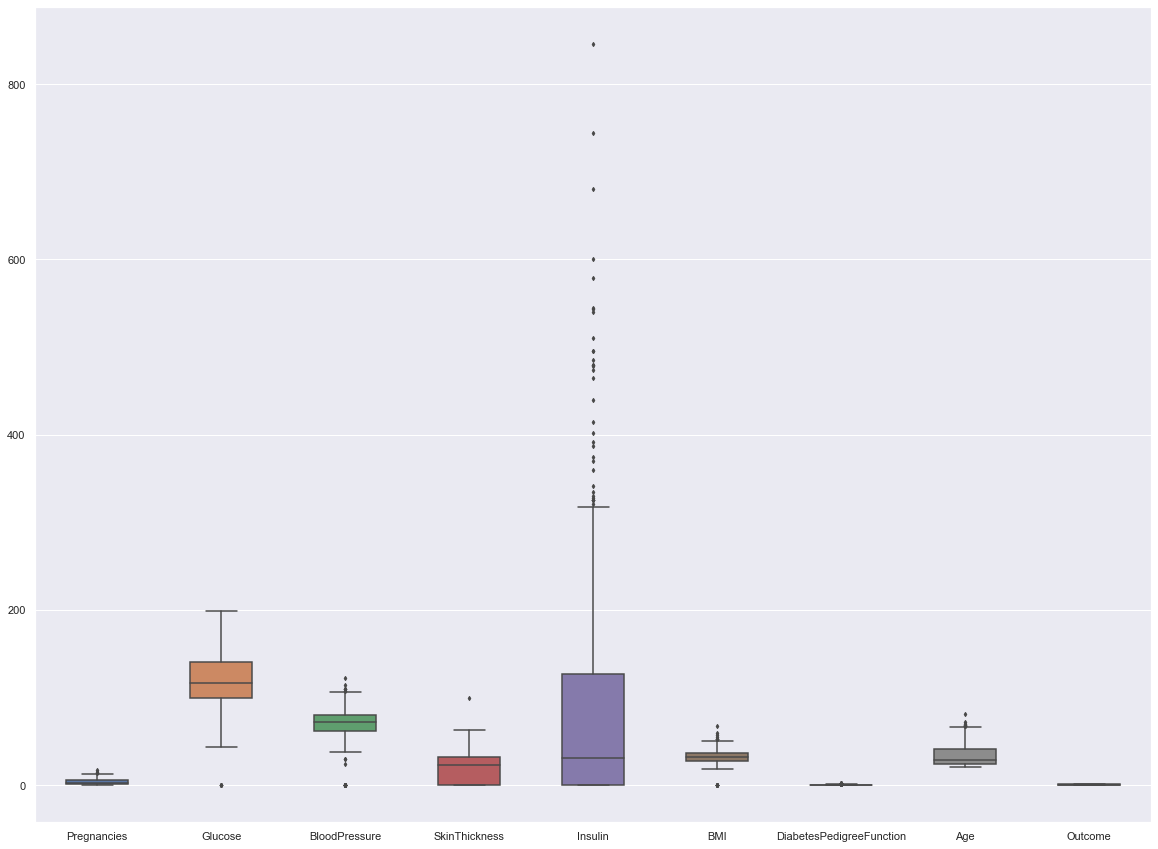

In [8]:
fig,ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=df,ax=ax,width=0.5,fliersize=3)

#### There are some columns having outliers which also must be removed

## 5. Feature Engineering

In [9]:
##Replacing 0 values
lst = ['BMI','SkinThickness','Insulin','BloodPressure','Glucose']
for i in lst:
    df[i]=df[i].replace(0,df[i].median())

F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

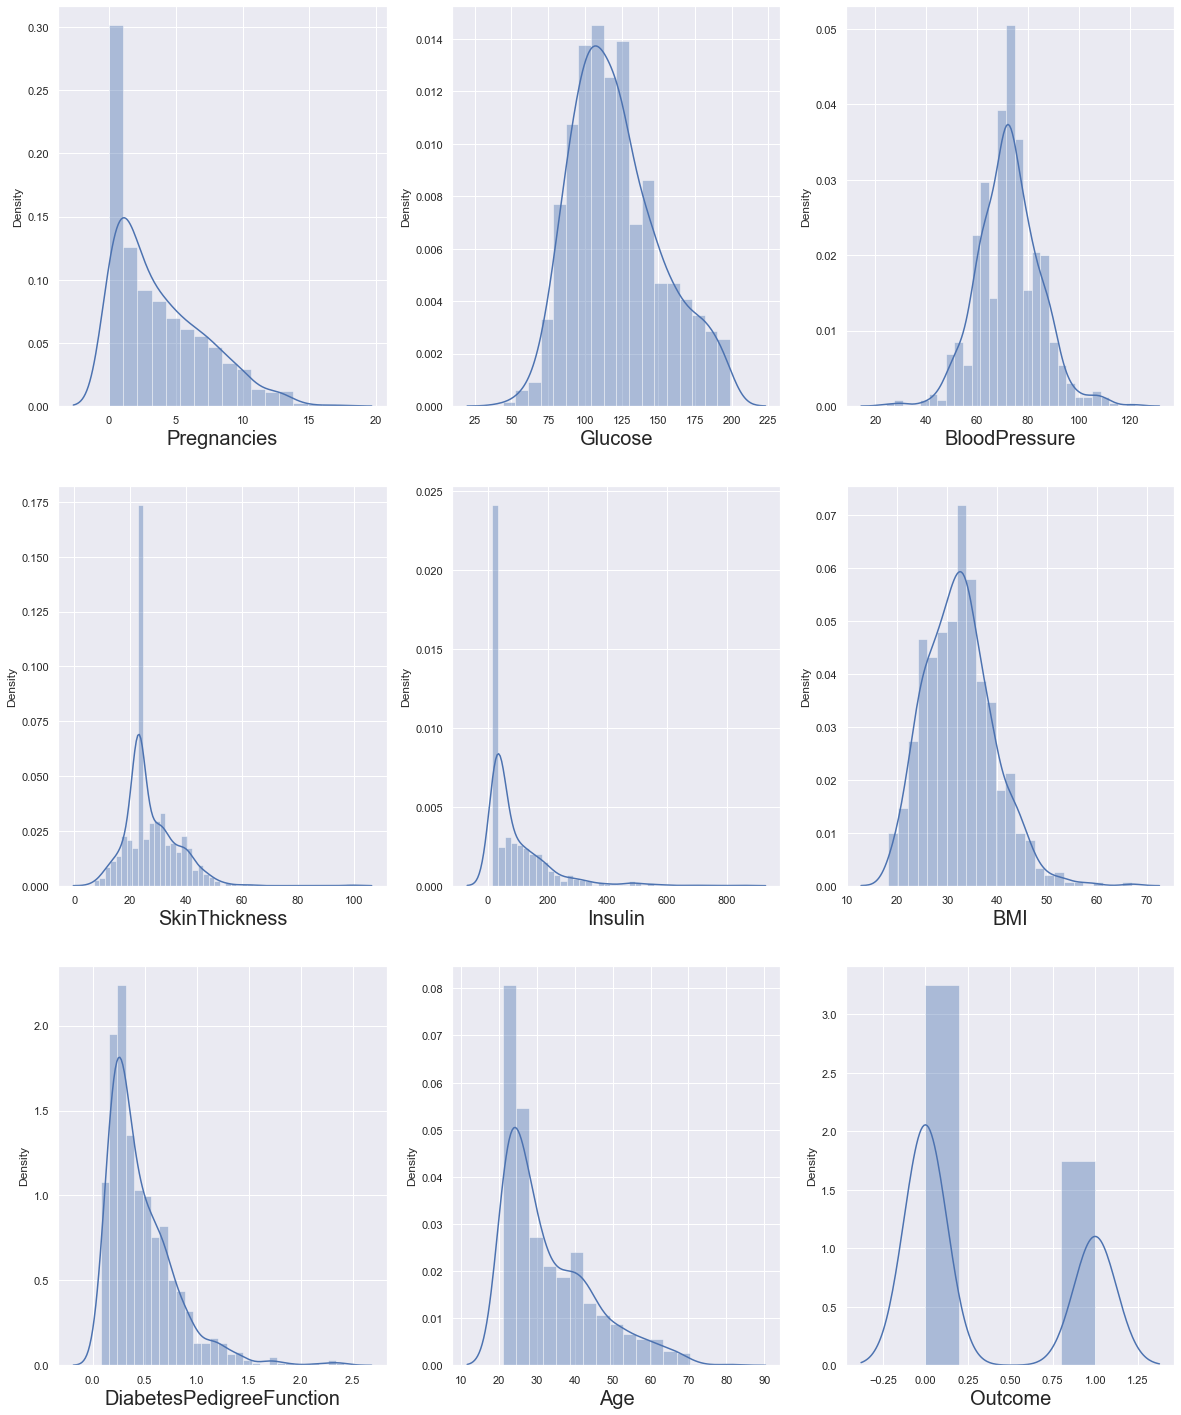

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
i=1
for column in df.columns:
    ax=plt.subplot(3,3,i)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=20)
    i+=1

In [11]:
##Handling outliers in data
def remove_outliers(data1,j):
    data=data1.copy()
    IQR = data[j].quantile(0.75)-data[j].quantile(0.25)
    lower = data[j].quantile(0.75) - 1.5*IQR
    upper = data[j].quantile(0.75) + 1.5*IQR
    data.loc[data[j]>upper,j]=upper
    data.loc[data[j]<lower,j]=lower
    return data

In [12]:
df_new=df.copy()
for i in df.columns:
    df_new = remove_outliers(df_new,i)

<AxesSubplot:>

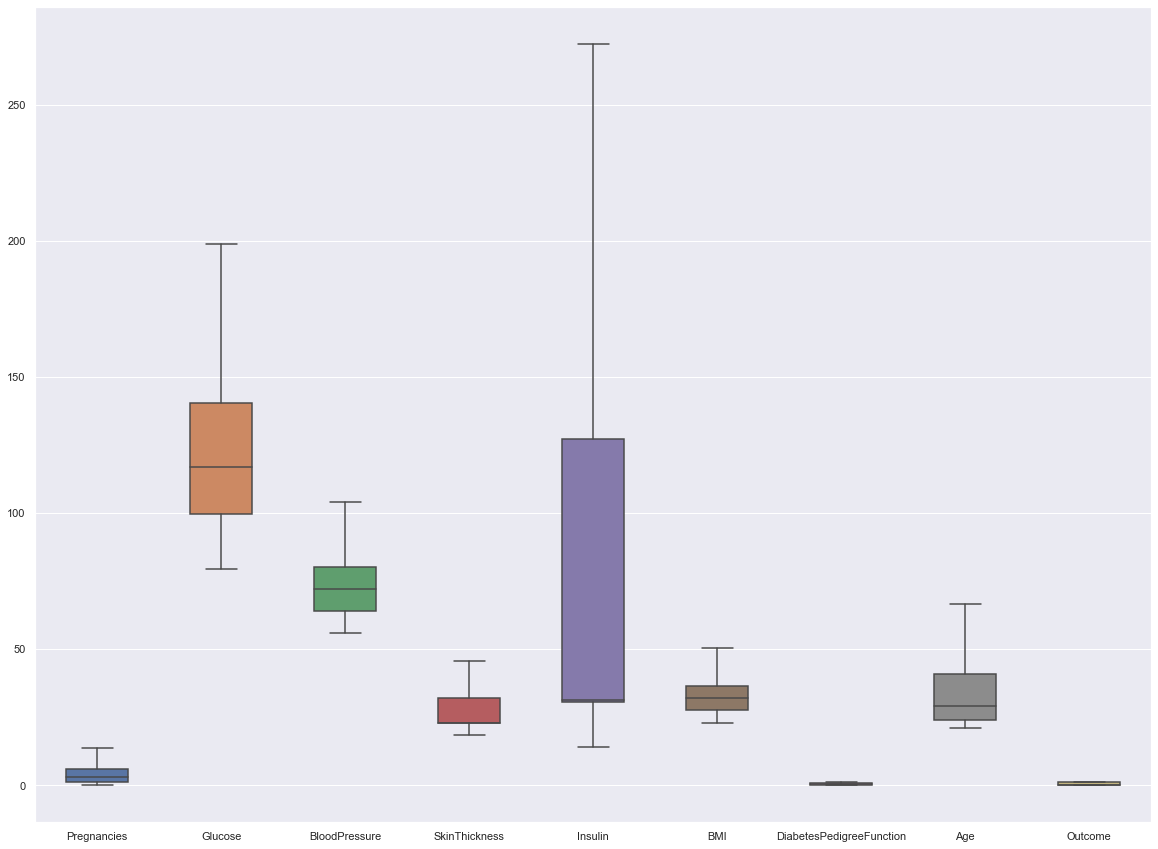

In [13]:
fig,ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=df_new,ax=ax,width=0.5,fliersize=3)

#### All the ouliers are handled as can be seen in boxplot

F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

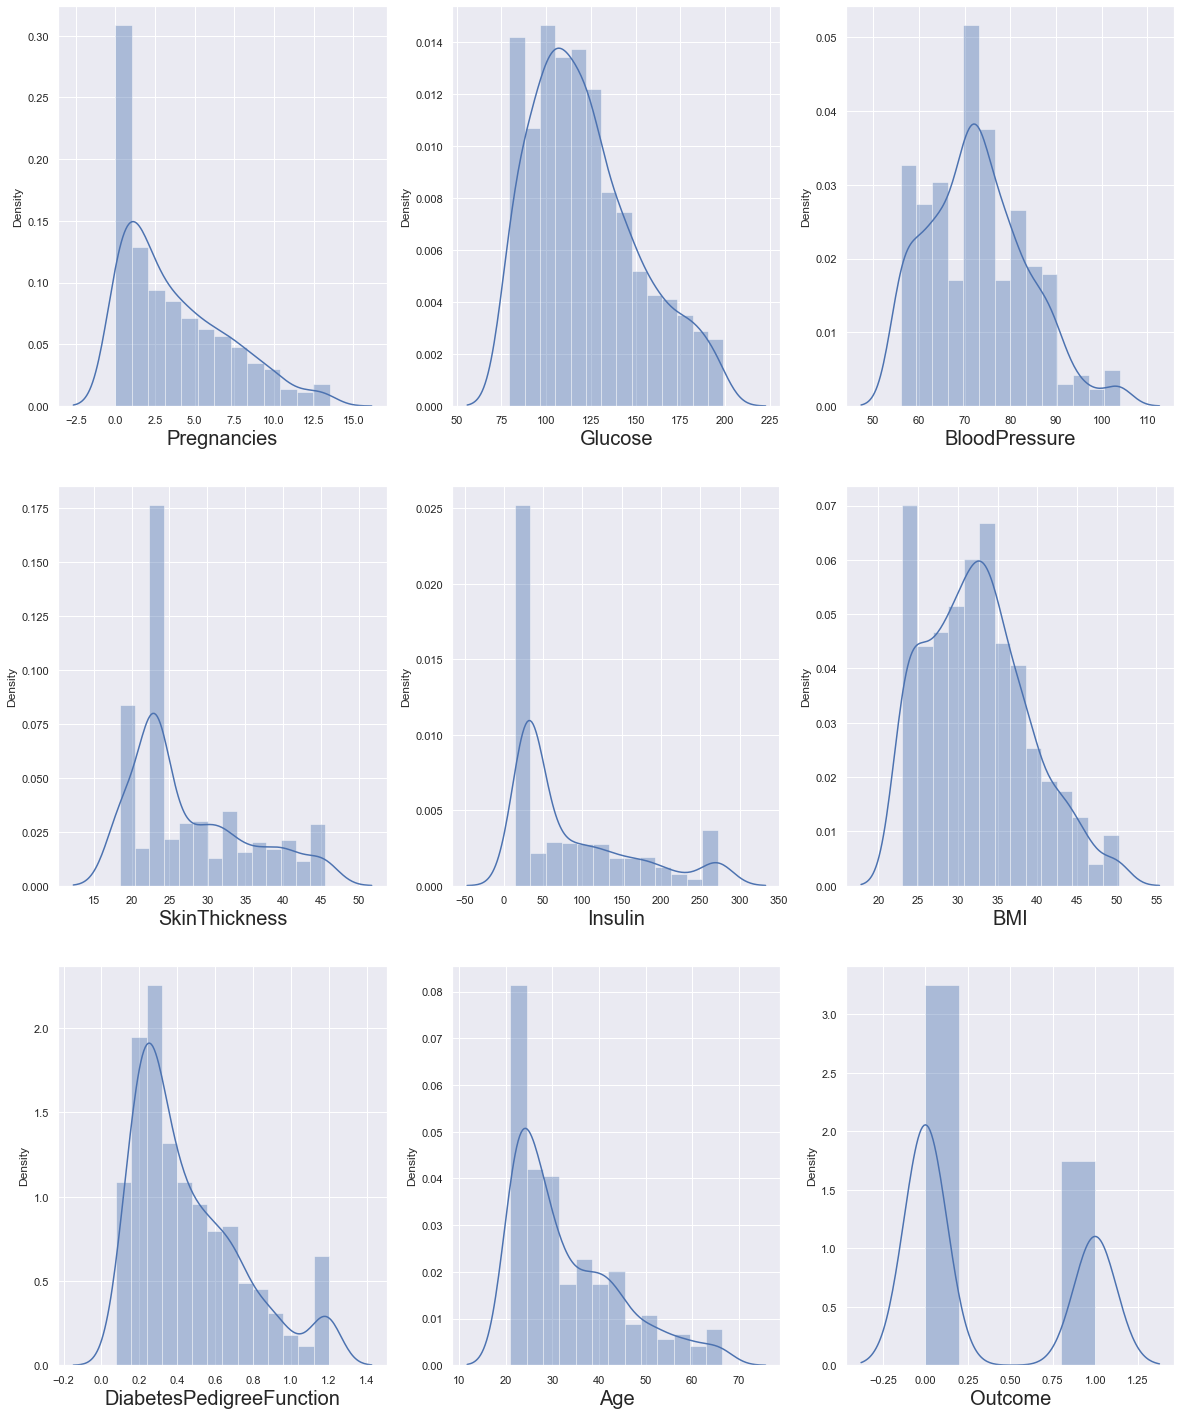

In [14]:
plt.figure(figsize=(20,25),facecolor='white')
i=1
for column in df_new.columns:
    ax=plt.subplot(3,3,i)
    sns.distplot(df_new[column])
    plt.xlabel(column,fontsize=20)
    i+=1

In [15]:
X = df_new.drop(columns=['Outcome'])
y = df_new['Outcome']

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

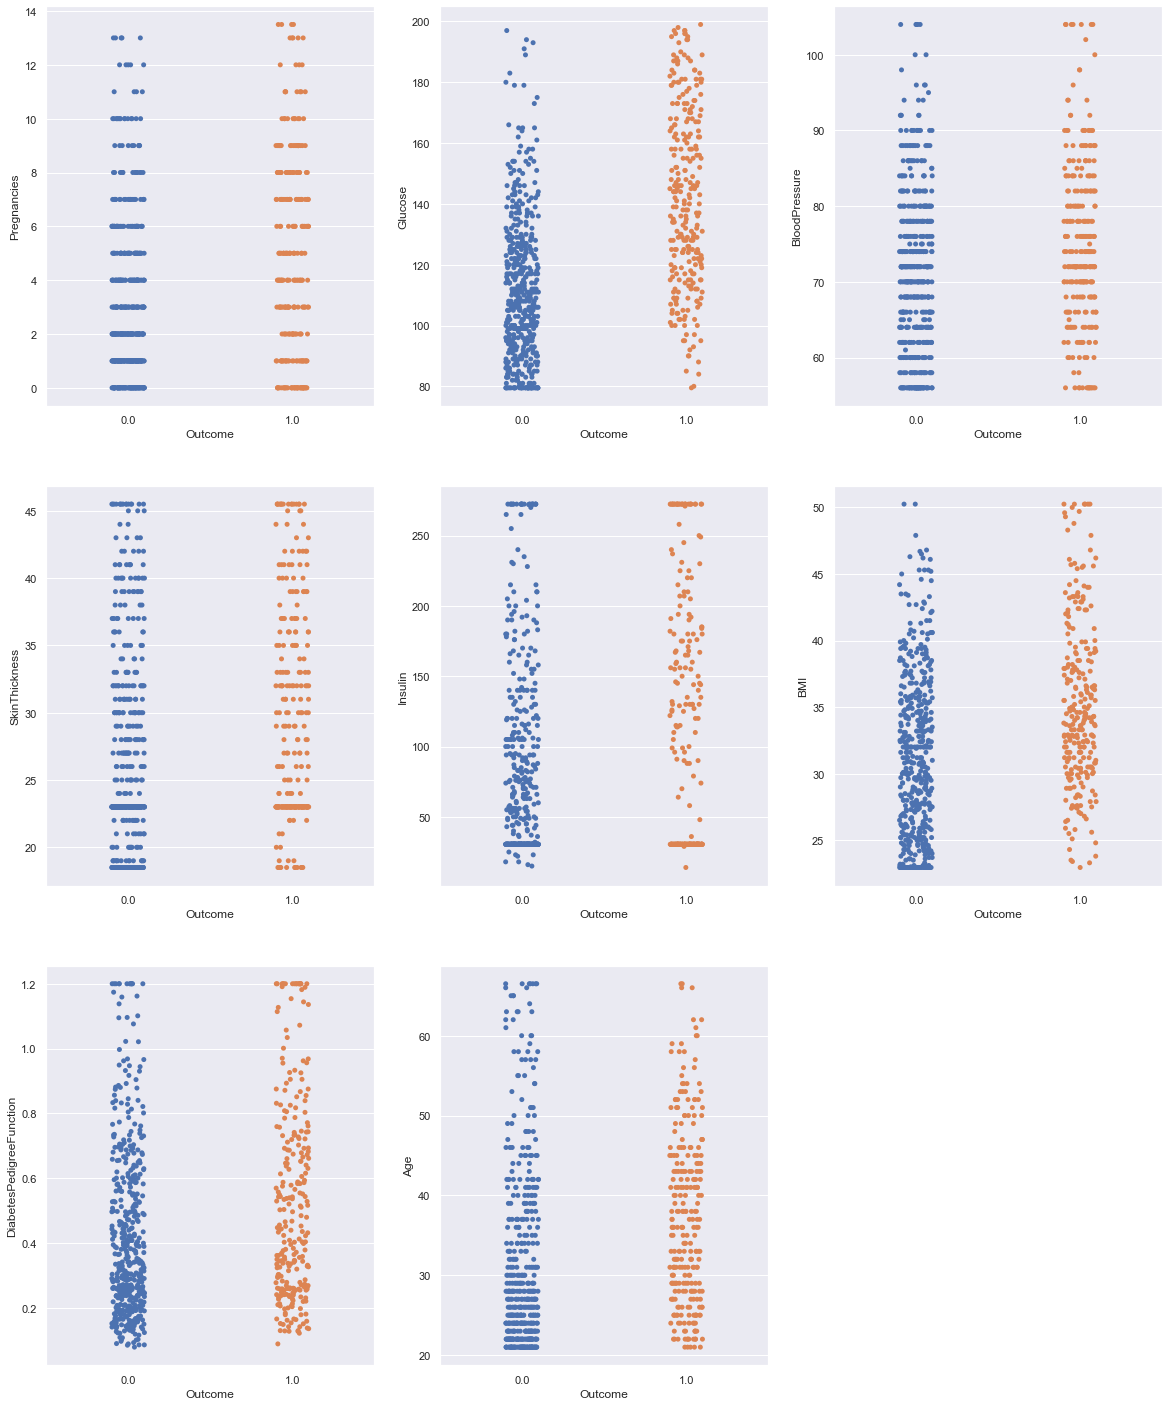

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
i = 1

for column in X:
    if i<=9 :
        ax = plt.subplot(3,3,i)
        sns.stripplot(y,X[column])
    i+=1
plt.show()

In [17]:
## Scaling of data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[ 0.64714967,  0.87215477, -0.07292627, ...,  0.16829575,
         0.58892732,  1.44569096],
       [-0.84896998, -1.24634196, -0.62472306, ..., -0.91602584,
        -0.37810147, -0.189304  ],
       [ 1.24559754,  2.04909739, -0.80865533, ..., -1.42720602,
         0.74659506, -0.10325164],
       ...,
       [ 0.34792574, -0.0357724 , -0.07292627, ..., -0.97798708,
        -0.74949659, -0.27535637],
       [-0.84896998,  0.13236226, -1.17651986, ..., -0.37386505,
        -0.38510892,  1.18753386],
       [-0.84896998, -0.9773265 , -0.25685853, ..., -0.32739412,
        -0.50423566, -0.87772293]])

## 6. Feature Selection

In [19]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.442160,Pregnancies
1,1.306573,Glucose
2,1.281826,BloodPressure
3,1.542936,SkinThickness
4,1.305358,Insulin
5,1.597831,BMI
6,1.056718,DiabetesPedigreeFunction
7,1.647769,Age


#### All the VIF values are less than 5 and are very low. This means there is no multicollinearity.

## 7. Model Building and training

In [45]:
##Splitting of data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=10)

In [46]:
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
# accuracy
accuracy1 = accuracy_score(y_test,y_pred)
accuracy1

0.734375

In [47]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
# accuracy
accuracy2 = accuracy_score(y_test,y_pred)
accuracy2

0.7395833333333334

In [48]:
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
# accuracy
accuracy3 = accuracy_score(y_test,y_pred)
accuracy3

0.6927083333333334

In [49]:
model4 = KNeighborsClassifier()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
# accuracy
accuracy4 = accuracy_score(y_test,y_pred)
accuracy4

0.71875

In [50]:
model5 = SVC()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
# accuracy
accuracy5 = accuracy_score(y_test,y_pred)
accuracy5

0.7239583333333334

In [51]:
model6 = xgboost.XGBClassifier()
model6.fit(X_train,y_train)
y_pred = model3.predict(X_test)
# accuracy
accuracy6 = accuracy_score(y_test,y_pred)
accuracy6

[19:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


F:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.6927083333333334

In [52]:
## Lets perform hyperparameter tuning on Random Forest as it is best performing model

In [53]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [54]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [55]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'gini'}

In [56]:
best_random_grid=rf_randomcv.best_estimator_

In [63]:
y_pred = best_random_grid.predict(X_test)
# accuracy
accuracy_random = accuracy_score(y_test,y_pred)
accuracy_random

0.7552083333333334

In [64]:
## Grid Search CV

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [670], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [200, 300, 400, 500, 600]}


In [66]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [670],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [200, 300, 400, 500, 600]},
             verbose=2)

In [67]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=670, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=14, n_estimators=400)

In [68]:
y_pred = best_grid.predict(X_test)
# accuracy
accuracy_grid = accuracy_score(y_test,y_pred)
accuracy_grid

0.7447916666666666

In [69]:
## Selecting best model

In [70]:
final_model = best_random_grid

In [71]:
y_pred = final_model.predict(X_test)

## 8. Model evaluation

In [72]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[108,  13],
       [ 34,  37]], dtype=int64)

In [73]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [74]:
#Precision
precision = tp/(tp+fp)
precision

0.8925619834710744

In [75]:
#Recall
recall = tp/(tp+fn)
recall

0.7605633802816901

In [76]:
#f1_score
f1_score = 2*recall*precision/(recall+precision)
f1_score

0.8212927756653993

In [77]:
#Area under curve
auc = roc_auc_score(y_test,y_pred)
auc

0.7068443720172274

In [78]:
## saving model and scaler
with open( 'model.sav', 'wb') as f:
    pickle.dump(final_model,f)
    
with open('scaler.sav', 'wb') as f:
    pickle.dump(scaler,f)

### ROC

In [79]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

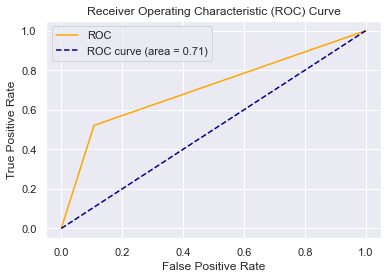

In [80]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 9. Deployment

The model has been deployed using flask on heroku cloud platform.